
Prediction: ['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No']
Accuracy: 0.4166666666666667


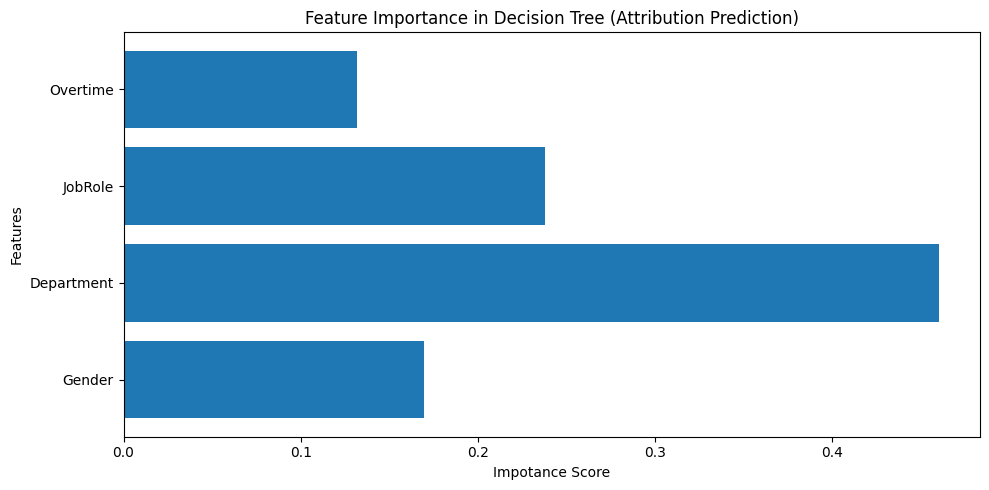

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("HR Attribution Dataset.csv")

le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

le_department = LabelEncoder()
df["Department"] = le_department.fit_transform(df["Department"])

le_jobrole = LabelEncoder()
df["JobRole"] = le_jobrole.fit_transform(df["JobRole"])

le_overtime = LabelEncoder()
df["Overtime"] = le_overtime.fit_transform(df["Overtime"])

le_attrition = LabelEncoder()
df["Attrition"] = le_attrition.fit_transform(df["Attrition"])

x=df[["Gender","Department","JobRole","Overtime"]]
y=df["Attrition"]

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

pred=model.predict(x_test)
pred_labels = le_attrition.inverse_transform(pred)


print("\nPrediction:",pred_labels)
print("Accuracy:", accuracy_score(y_test, pred))

plt.figure(figsize=(10,5))
plt.barh(x.columns,model.feature_importances_)
plt.xlabel("Impotance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree (Attribution Prediction)")
plt.tight_layout()
plt.show()